In [12]:
import sys
import sklearn
import numpy as np
import os

np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
# 4.1.1 정규방정식식
# 난수 값으로 선형 데이터셋 생성하기
import numpy as np

# 균일분포 난수 생성 후 (100, 1) 배열로 저장장
X = 2 * np.random.rand(100, 1)

# 평균 0, 표준편차 1의 가우시안분포 난수 생성한 뒤 배열(m, n)로 저장 
y = 4 + 3 * X + np.random.randn(100, 1)

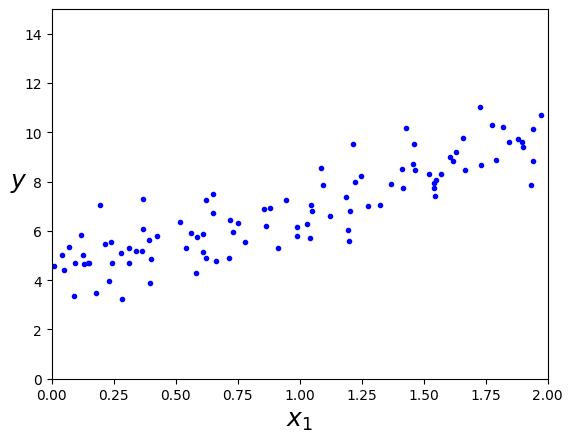

In [14]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b. ")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
# 모든 샘플에 1을 붙여서 2차원 배열 생성성
X_b = np.c_[np.ones((100, 1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# 기대값 [[4], [3]] : 노이즈 때문에 정확하게 구현하지 못했음음
theta_best

array([[4.21509616],
       [2.77011339]])

In [16]:
X_new = np.array([[0], [2]])

X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

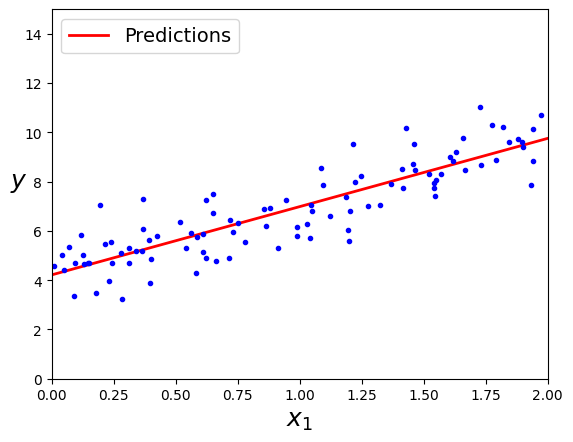

In [17]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b. ")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [18]:
# 사이킷럼으로 선형회귀 예측 결과 구현하기
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [19]:
X_new = np.array([[0], [2]])

lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [21]:
# 4.2.1 배치 경사 하강법
# 배치 경사 하강법을 사용한 선형회귀 예측 결과 구현

eta = 0.1           #학습률
n_iterations = 100  #반복횟수
m = 100             #샘플수

theta = np.random.randn(2, 1)

for n_iteration in range(n_iterations) :
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

theta

array([[4.13622106],
       [2.83975581]])

In [22]:
# 경사하강법 스텝 출력
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
  m = len(X_b)
  plt.plot(X, y, "b.")
  n_iterations = 1000
  for iteration in range(n_iterations):
    if iteration < 10:
      y_predict = X_new_b.dot(theta)
      style = "b-" if iteration > 0 else "r--"
      plt.plot(X_new, y_predict, style)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if theta_path is not None:
      theta_path.append(theta)
  plt.xlabel("$x_1$", fontsize=18)
  plt.axis([0, 2, 0, 15])
  plt.title(r"$\eta = {}$".format(eta), fontsize=16)


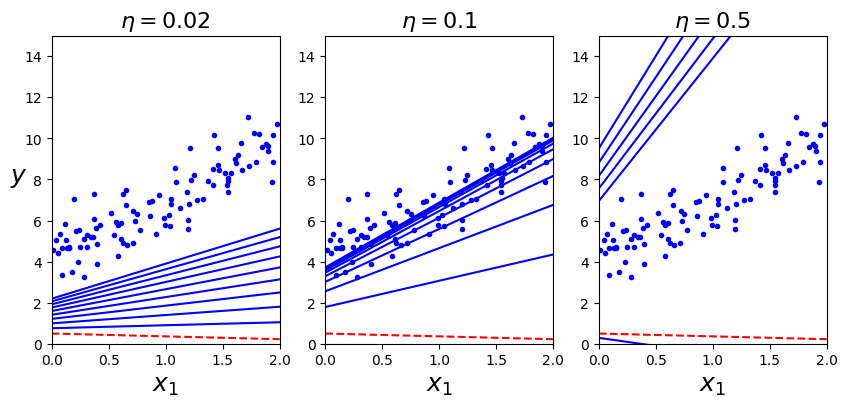

In [23]:
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [35]:
# 확률적 경사하강법
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50

def learnig_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)

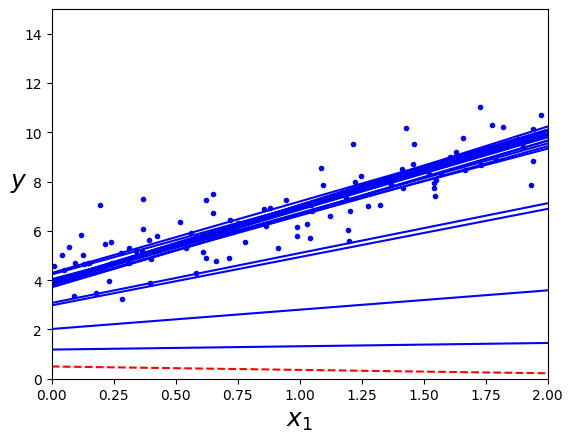

In [36]:
for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 20 :
      y_predict = X_new_b.dot(theta)
      style = "b-" if i > 0 else "r--"
      plt.plot(X_new, y_predict, style)
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learnig_schedule(epoch * m + i)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

plt.plot(X, y, "b. ")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [37]:
theta

array([[4.21076011],
       [2.74856079]])

In [38]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol= 1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [39]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19984658]), array([2.73198364]))

In [40]:
# 미니배치경사하강법
theta_path_mgd = []

n_iterations = 50
minibath_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000
def learnig_schedule(t):
  return t0 / (t + t1)

In [41]:
t = 0

for epoch in range(n_iterations) :
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0, m, +minibath_size):
    t += 1
    xi = X_b_shuffled[i:i+minibath_size]
    yi = y_shuffled[i:i+minibath_size]
    gradients = 2/minibath_size * xi.T.dot(xi.dot(theta) - yi)
    eta = learnig_schedule(t)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)

theta

array([[4.25214635],
       [2.7896408 ]])

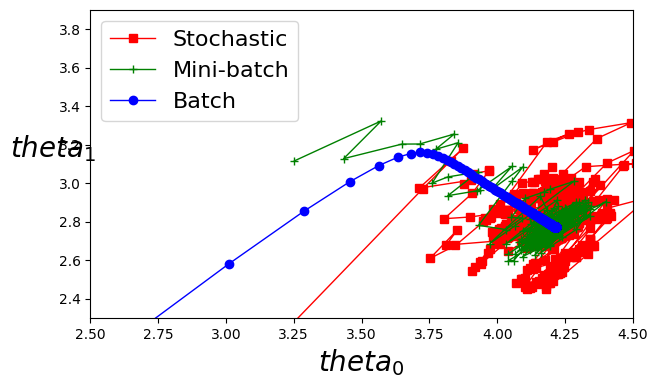

In [42]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=1, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=1, label="Batch")

plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$theta_0$", fontsize=20)
plt.ylabel(r"$theta_1$", rotation=0, fontsize=20)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()